In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from datetime import date, datetime, time
from datetime import timezone
import io

path = "/owid-covid-data.txt"

In [ ]:
df = pd.read_csv(path)

In [ ]:
ncs = df.new_cases_smoothed.value_counts(dropna=False)
df.groupby('new_cases_smoothed')['new_cases_smoothed'].count().max
ncs.idxmax()
df.new_cases_smoothed.fillna(ncs.idxmax(), inplace = True)
avg_ttlcss = df.total_cases.mean()
avg_ttldeth = df.total_deaths.mean()
avg_newdthsmoo = df.new_deaths_smoothed.mean()
avg_malsmok = df.male_smokers.mean()
df.new_deaths_smoothed.fillna(avg_newdthsmoo, inplace= True)
df.total_cases.fillna(avg_ttlcss, inplace= True)
df.total_deaths.fillna(avg_ttldeth, inplace= True)
df.male_smokers.fillna(avg_malsmok, inplace=True)
avg_emc = df.excess_mortality_cumulative_absolute.mean()
avg_exmocu = df.excess_mortality_cumulative.mean()
avg_emcm = df.excess_mortality_cumulative_per_million.mean()
avg_em = df.excess_mortality.mean()
df.excess_mortality_cumulative_absolute.fillna(avg_emc, inplace=True)
df.excess_mortality_cumulative.fillna(avg_exmocu, inplace=True)
df.excess_mortality_cumulative_per_million.fillna(avg_emcm, inplace=True)
df.excess_mortality.fillna(avg_em, inplace=True)

In [ ]:
max_cases= df.total_cases.value_counts(dropna=False)
df.groupby('total_cases')['total_cases'].count().max
max_cases.idxmax()

nan

In [ ]:
mca = df[df.total_cases == 5482962.657419518]

In [ ]:
selected_rows = df[df['continent'].isnull()]
df.dropna()
selected_rows

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1190,OWID_AFR,NaN,Africa,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1191,OWID_AFR,NaN,Africa,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1192,OWID_AFR,NaN,Africa,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1193,OWID_AFR,NaN,Africa,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1194,OWID_AFR,NaN,Africa,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297465,OWID_WRL,NaN,World,2023-04-03,762174149.0,46204.0,98257.000,6892917.0,189.0,644.571,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
297466,OWID_WRL,NaN,World,2023-04-04,762200405.0,26256.0,90750.857,6893177.0,260.0,611.143,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
297467,OWID_WRL,NaN,World,2023-04-05,762200405.0,0.0,79709.571,6893177.0,0.0,565.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
297468,OWID_WRL,NaN,World,2023-04-06,762200405.0,0.0,62620.286,6893177.0,0.0,471.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


In [ ]:
df2 = df.groupby("new_cases")[["new_deaths"]].mean()
df2

,new_deaths
new_cases,
0.0,0.180969
1.0,0.058893
2.0,0.076028
3.0,0.117958
4.0,0.149670
...,...
6966046.0,628.000000
7051234.0,975.000000
7214500.0,1081.000000


In [87]:
pathh = '/covid-vaccination-doses-per-capita.csv'
dfff = pd.read_csv(pathh)

In [94]:
dfff["Date"] = pd.to_datetime(dfff["Day"])
dfff.set_index("Date", inplace= True)
dfff.drop(["Day"], axis=1, inplace=True)

In [99]:
len(dfff["Entity"].unique())
covid = dfff.groupby(["Entity"])
for key, group in covid:
  print("+key:", key)
  print("+number:", len(group))
  print(group.head())

+key: Afghanistan
+number: 105
                 Entity Code  total_vaccinations_per_hundred
Date                                                        
2021-02-22  Afghanistan  AFG                            0.00
2021-02-28  Afghanistan  AFG                            0.02
2021-03-16  Afghanistan  AFG                            0.13
2021-04-07  Afghanistan  AFG                            0.29
2021-04-22  Afghanistan  AFG                            0.58


+key: Africa
+number: 814
            Entity Code  total_vaccinations_per_hundred
Date                                                   
2021-01-09  Africa  NaN                             0.0
2021-01-10  Africa  NaN                             0.0
2021-01-11  Africa  NaN                             0.0
2021-01-12  Africa  NaN                             0.0
2021-01-13  Africa  NaN                             0.0


+key: Albania
+number: 278
             Entity Code  total_vaccinations_per_hundred
Date                                

In [132]:
tt_df = covid.sum()
tt_df.head()

,total_vaccinations_per_hundred
Entity,
Afghanistan,1856.67
Africa,20882.84
Albania,13476.08
Algeria,664.55
Andorra,6535.35


In [111]:
mp = folium.Map(location = [30.59268591589684, 114.30501750705282],
                zoom_start= 15,
                )
tooltip = "Ухань"
tooltip1 = "рынок в Ухане"
folium.Marker(location=[30.59268591589684, 114.30501750705282], popup = "Ухань",tooltip=tooltip, icon=folium.Icon(color = 'gray')).add_to(mp)

folium.CircleMarker(
    location=[30.607865953355248, 114.23899853535106],
    redius = 150, popup = "Рынок в Ухане",tooltip=tooltip1,
).add_to(mp)
mp

In [137]:
center = [60.66548581430528, 4.3275401006953595]

m = folium.Map(location = center, zoom_start = 2,
               max_bounds = True,
               min_zoom  = 1, min_lat = -80,
               max_lat = 85, min_lon = -180, max_lon = 190,
               )
geo_path = "/World_Countries_(Generalized).geojson"

json_data = json.load(open(geo_path))
folium.Choropleth(geo_data = json_data,
                  data = total_df,
                  columns = (total_df.index, "total_vaccinations_per_hundred"),
                  key_on = 'properties.COUNTRY',
                  fill_color = 'PuBu',
                  fill_opacity =0.8,
                  line_opacity = 0.4,
                  ).add_to(m)

folium.LayerControl().add_to(m)

In [ ]:
geo_path = "/content/World_Countries_(Generalized).geojson"

json_data = json.load(open(geo_path))
folium.Choropleth(geo_data = json_data,
                  data = total_df,
                  columns = (total_df.index, "totalvaccinationsperhundred"),
                  key_on = 'properties.COUNTRY',
                  fill_color = 'PuBu',
                  fill_opacity =0.8,
                  line_opacity = 0.4,
                  ).add_to(m)

folium.LayerControl().add_to(m)

In [ ]:
import json
import folium
import pandas as pd

#Load Data
geo_data = json.load(open("us-states.json"))
emp_data = pd.read_csv("us-unemployment.csv")

#Create base map
map = folium.Map(location=[37.0902,-100.7129], zoom_start = 4)

#Method to create Choropleth map, All parameters are mandatory
folium.Choropleth(
    geo_data=geo_data, data=emp_data,
    name = 'Unemployment Rate',
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(map)

#Save the map
map.save("map1.html")

In [ ]:
mca = mca.drop_duplicates(subset=['location'])

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df["total_cases"], labels = df["continent"])
 
plt.show()

<Axes: xlabel='continent'>

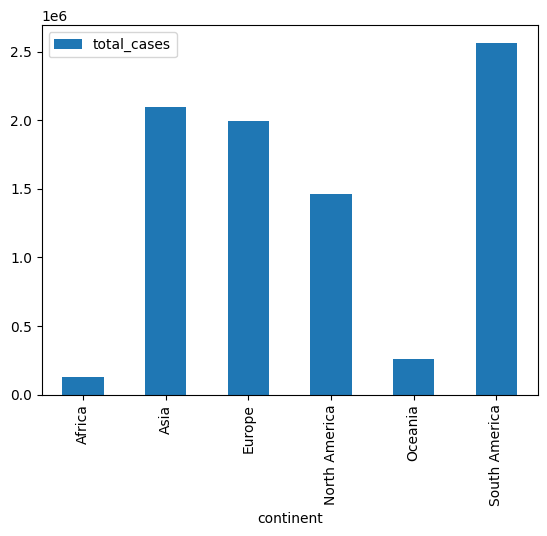

In [ ]:
df2 = df.groupby("continent")[["total_cases"]].mean()
df2.plot.bar()

<Axes: xlabel='continent'>

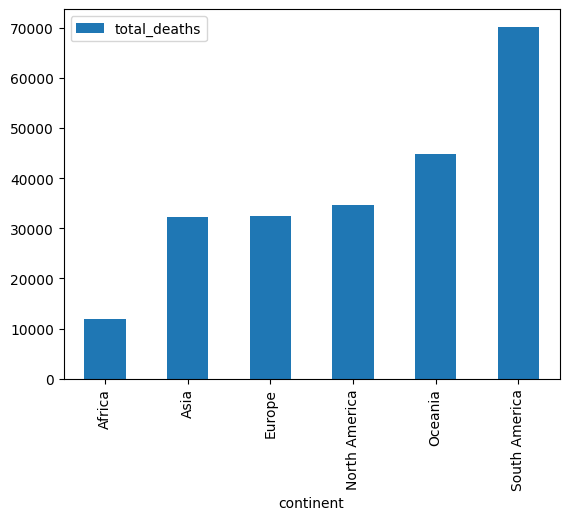

In [ ]:
df3 = df.groupby("continent")[["total_deaths"]].mean()
df3.plot.bar()

In [ ]:
mca = df[df.total_cases == 5482962.657419518]

In [ ]:
!pip install folium
import folium
import json
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

m = folium.Map(loction = [58.06288405025338, 3.4042395463064525], zoom_start = 1000000)

tooltip = "center"

folium.Marker([58.06288405025338, 3.4042395463064525], popup = "center", tooltip = tooltip).add_to(m)